In [92]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";

# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="1";

In [93]:
import cv2
import numpy as np 
import pandas as pd
#from keras.backend import set_image_data_format
from tensorflow.keras.preprocessing import image
from skimage.io import imread_collection, imread
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import warnings
import os
warnings.filterwarnings('ignore')
%matplotlib inline

### Functions for read images in correct order

### Read images from database

In [94]:
path = '/data/flavio/Camila/imagens/clahe/originais-clahe/lung-clahe/'
image_names = os.listdir(path)
gray_images = [imread(path+str(name)+'') for name in image_names]
print('The database has {} segmented images'.format(len(gray_images)))


The database has 6012 segmented images


In [95]:
gray_images[0].shape

(256, 256)

In [96]:
#from tqdm import tqdm
#resize_i = []
#for i in tqdm(gray_images): 
 #          im = cv2.resize((i),(256, 256))
  #         resize_i.append(im)
            

In [97]:
#resize_i[0].shape

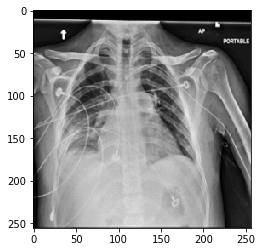

In [98]:
import matplotlib.pyplot as plt
plt.imshow(gray_images[8], cmap='gray')

In [99]:
#for i, im in enumerate(gray_images):
 #    image = im[i].reshape(258,258) jhghg

In [100]:
images = np.zeros((len(gray_images), gray_images[0].shape[0], gray_images[0].shape[1], 3))

for i, im in enumerate(gray_images):
    for j in range(3):
        images[i, :, :, j] = im
        #print(i)

In [101]:
model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3), pooling='avg')

In [102]:
x = preprocess_input(images)

features = model.predict(x)

In [103]:
features[0].shape

(512,)

In [104]:
features

array([[1.8763129 , 2.118296  , 2.3505375 , ..., 1.2103128 , 2.1756222 ,
        5.218935  ],
       [3.145153  , 0.7054979 , 1.2267711 , ..., 0.26348475, 2.0938118 ,
        0.11302229],
       [6.2679377 , 3.4413235 , 0.59431905, ..., 0.45602262, 4.3155546 ,
        0.25452882],
       ...,
       [0.93261826, 3.2606997 , 2.3961306 , ..., 1.6007615 , 3.8152795 ,
        0.23078808],
       [2.71799   , 0.6320168 , 2.3636665 , ..., 0.5056915 , 3.703392  ,
        1.3813549 ],
       [3.175407  , 0.29281873, 2.7216303 , ..., 0.74131787, 3.0175354 ,
        0.4269893 ]], dtype=float32)

In [105]:
#import numpy as np
#np.save('./vgg.csv', features)

In [106]:
matriz_csv = pd.DataFrame(features)

In [107]:
matriz_csv.to_csv('/data/flavio/Camila/csv_clahe/vgg16/Lung/original/vgg16_semseg.csv', index=False)

In [108]:
matriz_csv

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,1.876313,2.118296,2.350538,0.474030,0.121013,0.560460,0.000000,8.007498,0.689638,0.679177,...,0.923213,0.710657,3.731614,2.181906,0.000000,1.182148,1.039273,1.210313,2.175622,5.218935
1,3.145153,0.705498,1.226771,0.644759,0.014237,0.540998,0.053127,4.195190,4.013473,4.143245,...,6.285887,0.497114,6.966183,1.852853,0.000000,0.002126,0.491431,0.263485,2.093812,0.113022
2,6.267938,3.441324,0.594319,0.206358,0.187122,0.000000,2.056947,0.683649,5.077357,0.198528,...,6.979148,1.466163,6.537251,5.895635,0.079496,1.456865,0.123172,0.456023,4.315555,0.254529
3,2.504478,0.012038,0.743011,0.000000,0.019500,1.081191,0.402164,4.903756,2.224998,1.034817,...,0.649735,1.648829,11.402003,4.353302,0.087808,0.199244,1.403822,0.000000,4.591254,1.095926
4,4.478085,0.751330,0.049398,0.758233,0.412919,0.701057,0.364910,3.638179,0.756169,3.530993,...,3.628678,1.236613,2.584534,9.557904,0.159414,0.756975,1.883378,3.932736,2.098947,2.005021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,3.324901,0.058823,1.378268,0.114551,3.663175,0.705839,0.051382,0.355015,3.576995,0.122212,...,0.216917,1.713328,17.748774,8.208362,0.000000,0.407489,0.595985,0.478654,2.686346,1.751843
6008,1.539019,0.000000,0.000000,1.015117,0.268542,0.202332,0.105662,0.637998,2.839586,3.738882,...,4.719752,2.469861,5.573921,0.457761,0.000000,7.864140,0.305983,1.299188,1.586913,1.671860
6009,0.932618,3.260700,2.396131,0.425447,0.316104,0.698784,0.111164,5.391039,0.266495,2.568875,...,1.852410,3.247694,11.511068,4.247784,0.093708,2.511914,1.945708,1.600762,3.815279,0.230788
6010,2.717990,0.632017,2.363667,0.275290,0.000238,0.067079,0.000000,2.192417,5.433681,1.859143,...,2.046347,1.931354,10.411982,1.225589,0.000000,2.042803,0.650860,0.505692,3.703392,1.381355
